In [ ]:
#| hide
import os
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from HierarchicalGeoClustering.TreeClusters import *
from HierarchicalGeoClustering.Clustering import *


# Hierarchical Geo Clustering 

> 

## Install

The library uses the cgal library, if the library is use inside a conda enviroment the installation procedure should create the enviroment and install the cgal library using ` conda install -c conda-forge cgal`. 


To install the library can be simply:

`pip install git+https://github.com/CentroGeo/HierarchicalGeoClustering.git`

## How to use

### Build a TreeCluster

We can build a hierarchical geographical cluster, the `TreeCluster` class allows to create te structure and then populate it.

In [ ]:
HGC = TreeClusters(3, random_seed= 12)

In [ ]:
HGC.populate_tree(number_per_cluster=100)

In [ ]:
HGC.print_structure()

Root
Root    
├── Root_l_0_n_0
│   ├── Root_l_0_n_0_l_1_n_0
│   │   ├── Root_l_0_n_0_l_1_n_0_l_2_n_0
│   │   ├── Root_l_0_n_0_l_1_n_0_l_2_n_1
│   │   ├── Root_l_0_n_0_l_1_n_0_l_2_n_2
│   │   ├── Root_l_0_n_0_l_1_n_0_l_2_n_3
│   │   └── Root_l_0_n_0_l_1_n_0_l_2_n_4
│   └── Root_l_0_n_0_l_1_n_1
│       ├── Root_l_0_n_0_l_1_n_1_l_2_n_0
│       └── Root_l_0_n_0_l_1_n_1_l_2_n_1
├── Root_l_0_n_1
│   ├── Root_l_0_n_1_l_1_n_0
│   │   └── Root_l_0_n_1_l_1_n_0_l_2_n_0
│   ├── Root_l_0_n_1_l_1_n_1
│   │   ├── Root_l_0_n_1_l_1_n_1_l_2_n_0
│   │   ├── Root_l_0_n_1_l_1_n_1_l_2_n_1
│   │   └── Root_l_0_n_1_l_1_n_1_l_2_n_2
│   ├── Root_l_0_n_1_l_1_n_2
│   ├── Root_l_0_n_1_l_1_n_3
│   │   ├── Root_l_0_n_1_l_1_n_3_l_2_n_0
│   │   └── Root_l_0_n_1_l_1_n_3_l_2_n_1
│   └── Root_l_0_n_1_l_1_n_4
│       ├── Root_l_0_n_1_l_1_n_4_l_2_n_0
│       ├── Root_l_0_n_1_l_1_n_4_l_2_n_1
│       └── Root_l_0_n_1_l_1_n_4_l_2_n_2
└── Root_l_0_n_2
    ├── Root_l_0_n_2_l_1_n_0
    │   ├── Root_l_0_n_2_l_1_n_0_l_2_n_0
    │ 

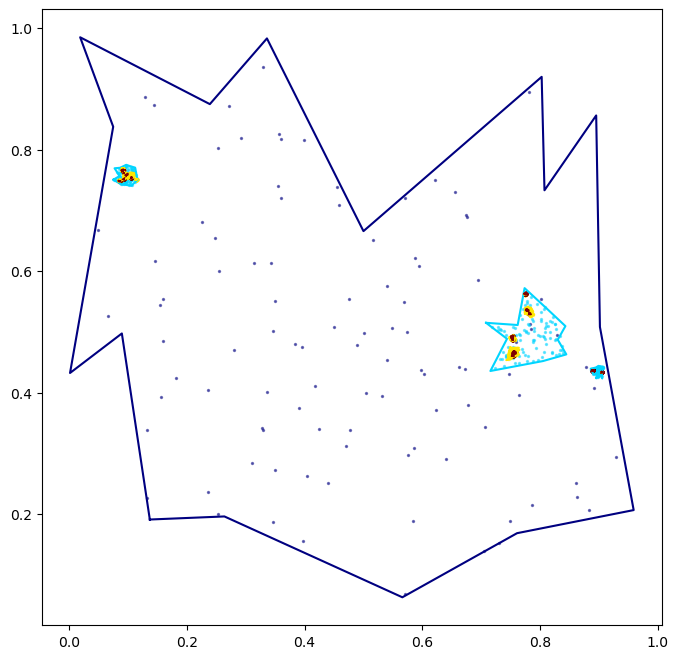

In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
HGC.visualize(axs, polygon=True)

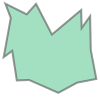

In [ ]:
HGC.root.polygon_cluster

In [ ]:
HGC.get_deepth()

4

### Extract the points and clusterize
To clusterize we extract the points and use the clusterize tool implemented in the `Clustering` module

In [ ]:
original_points= HGC.get_points_tree()
X_2=np.array([[p.x,p.y] for p in original_points])
dic_points={'points':[X_2], 'parent':''}

In [ ]:
HGC_adapta_DBSCAN = recursive_clustering_tree(dic_points,
                                       levels_clustering = 3,
                                       algorithm = 'adaptative_DBSCAN'
                                      )

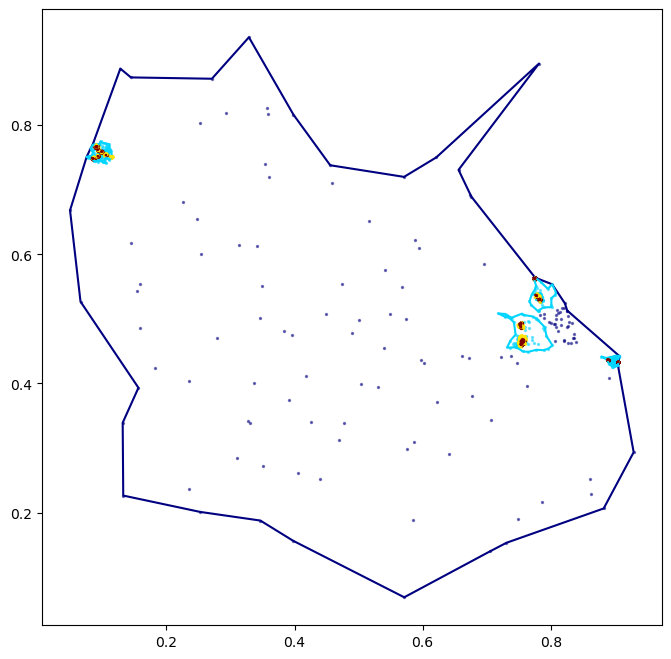

In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
HGC_adapta_DBSCAN.visualize(axs, polygon=True)

### Get the Similarity Shape Measurement

To obtain the SSM the clusters tree has to be used, this due to the use of the geometric shape in the metric. Therefore the polygons of each cluster on each level has to be able to compare. 

In [ ]:
form_metric=[]

for l in range(0, 4):
    d = { 'Level': l,                              
        'adaptive DBSCAN':SSM(HGC.levels_nodes[l],
                            HGC_adapta_DBSCAN.levels_nodes[l])
        }
    form_metric.append(d)

In [ ]:
form_metric

[{'Level': 0, 'adaptive DBSCAN': 0.7963841965263598},
 {'Level': 1, 'adaptive DBSCAN': 0.5072991561547473},
 {'Level': 2, 'adaptive DBSCAN': 0.5257549553632676},
 {'Level': 3, 'adaptive DBSCAN': 0.3398000440017718}]

In [ ]:
df_metric_form = pd.DataFrame(form_metric)

In [ ]:
df_metric_form

,Level,adaptive DBSCAN
0,0,0.796384
1,1,0.507299
2,2,0.525755
3,3,0.339800


A detail [documentation](https://centrogeo.github.io/HierarchicalGeoClustering/) is available 